## Theano monitor

This notebook contains the code to generate updating graphs to monitor the training progress of a model

In [1]:
#%reset -f
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm
import pandas as pd
%matplotlib notebook
from scipy.interpolate import splrep, splev
from ipywidgets import *
#import ipywidgets as ipywidgets
from IPython.display import display

<IPython.core.display.Javascript object>


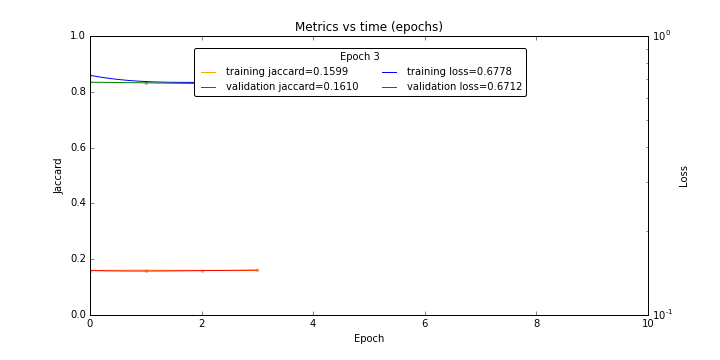

In [11]:
# displaying the text widget
run = widgets.Text(description="Run #", value=str(np.load('./data/misc/run_counter.npy')), width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Jaccard')
ax2.set_ylabel('Loss')
ax1.set_title('Metrics vs time (epochs)')
ax1.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax1 or ax2:
        ax1.clear()
        ax2.clear()
    
    # Jaccard       
    ax1.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.2)
    ax1.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.2)
    
    
    x,y = smoothen('jaccard')
    jaccard, = ax1.plot(x,y,'-',color='orange',label="training jaccard = %04f" %data['jaccard'].iloc[-1])
    x,y = smoothen('val_jaccard')
    val_jaccard, = ax1.plot(x,y,'-',color='red',label="validation jaccard=%04f" %data['val_jaccard'].iloc[-1])
    ax1.set_ylabel('Jaccard')
    ax1.set_xlabel('Epoch')
    #ax1.legend()
    
    # Loss    
    ax2.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.2)
    ax2.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('loss')
    loss, = ax2.plot(x,y,'-',color='blue',label="training loss=%04f" %data['loss'].iloc[-1])
    x,y = smoothen('val_loss')
    val_loss, = ax2.plot(x,y,'-',color='green',label="validation loss=%04f" %data['val_loss'].iloc[-1])
    ax2.set_ylabel('Loss')
    ax2.set_yscale('log')
    #ax2.legend()
    
    ax1.set_ylim([0,1])
    xlim = 10
    while xlim - data['epoch'].iloc[-1]<2:
        xlim += 5
    ax1.set_xlim([0,xlim])
    plt.figlegend((jaccard,val_jaccard,loss,val_loss),
                  ("training jaccard={:0.4f}".format(data['jaccard'].iloc[-1]),
                   "validation jaccard={:0.4f}".format(data['val_jaccard'].iloc[-1]),
                   "training loss={:0.4f}".format(data['loss'].iloc[-1]),
                  "validation loss={:0.4f}".format(data['val_loss'].iloc[-1])),
                  loc='upper center',ncol=2,fancybox=True, shadow=False,
                  title='Epoch {}'.format(data['epoch'].iloc[-1]),fontsize='medium',bbox_to_anchor=(0.5, .88))
    ax1.set_title('Metrics vs time (epochs)')
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/logs/training_log_run_{}_nuclei.csv'.format(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)